# Imports

In [6]:
import matplotlib.pyplot as plt

In [7]:
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

# Plot samples

In [24]:
%run ../tools/augmentation.py
%run ../cxr14.py
%run ../jsrt.py
%run ../vinbig.py

In [25]:
kwargs = {
#     'crop': None,
#     'translate': None,
#     'shear': None,
#     'rotation': None,
#     'contrast': None,
#     'brightness': None,
#     'noise_gaussian': None,
}

dataset = VinBigDataset(image_format='L', masks=True)
aug_dataset = Augmentator(dataset, dont_shuffle=True, seg_mask=True, **kwargs)
len(dataset), len(aug_dataset)

(13500, 135000)

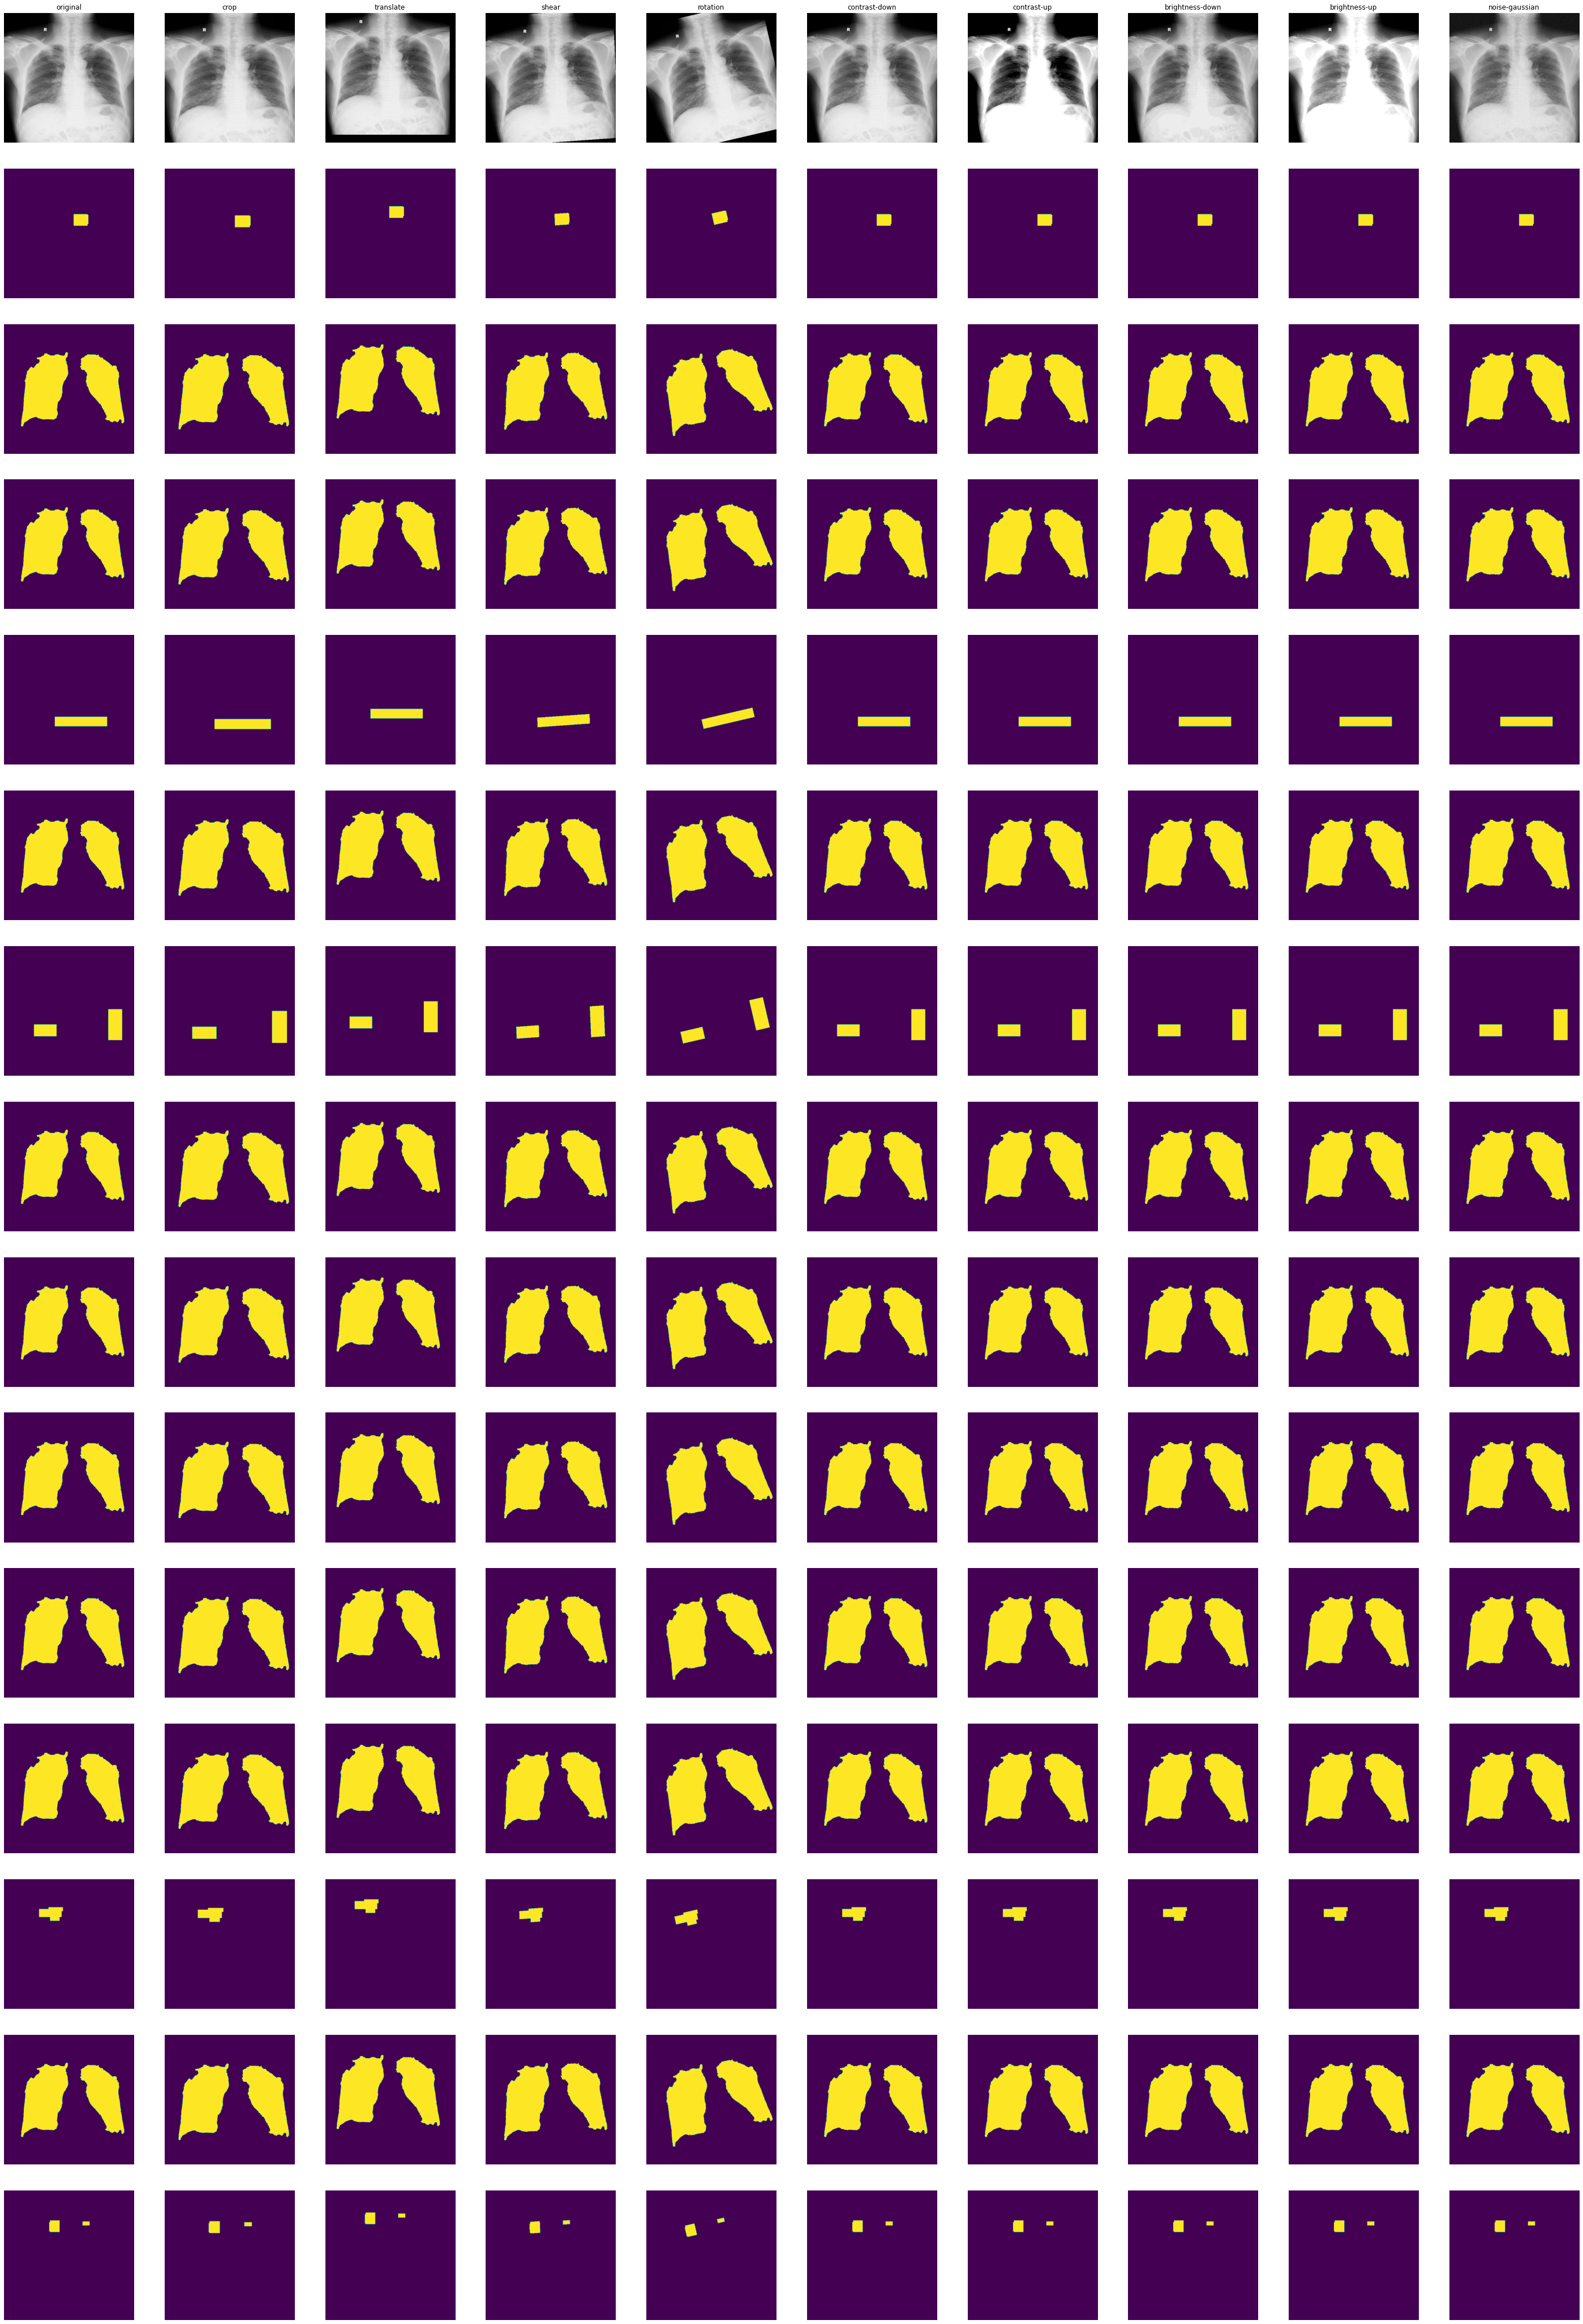

In [27]:
aug_dataset.plot_augmented_samples(4, n_masks=14)

In [28]:
sample_idx = 0
n_methods = len(aug_dataset._aug_fns)

start_idx = sample_idx * (n_methods + 1)
for i, method in enumerate(['original'] + list(aug_dataset._aug_fns)):
    idx = start_idx + i
    image = aug_dataset[idx].image
    print(f'{method:10}\t', image.type(), image.size(), image.min(), image.max())

original  	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1974) tensor(1.8058)
crop      	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1974) tensor(1.8058)
translate 	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1974) tensor(1.8058)
shear     	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1974) tensor(1.8058)
rotation  	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1974) tensor(1.8058)
contrast-down	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-1.2868) tensor(1.1465)
contrast-up	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1974) tensor(1.8058)
brightness-down	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1974) tensor(-0.0466)
brightness-up	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1974) tensor(1.8058)
noise-gaussian	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.5831) tensor(2.0666)


# Gaussian noise

In [ ]:
%run ../../utils/common.py

In [ ]:
dataset2 = JSRTDataset(image_format='RGB')
len(dataset2)

In [ ]:
item = dataset2[3]
image = item.image
image.size()

In [ ]:
image.min(), image.max()

In [ ]:
image2 = image + torch.randn(image.size()[-2:], device=image.device) * 0.1
# image3 = tensor_to_range01(image) + torch.randn(image.size(), device=image.device) * 0.1

plt.figure(figsize=(15, 5))
n_rows = 2

plt.subplot(1, n_rows, 1)
plt.imshow(tensor_to_range01(image).permute(1, 2, 0), cmap='gray')

plt.subplot(1, n_rows, 2)
plt.imshow(tensor_to_range01(image2).permute(1, 2, 0), cmap='gray')

# plt.subplot(1, 3, 3)
# plt.imshow(image3, cmap='gray')

In [ ]:
noise = (image - image2)
noise.min(), noise.max(), noise.mean()